In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.ndimage.interpolation import shift

import nbimporter
from lib import *

import gym
import gym_env
from stable_baselines3 import TD3, A2C, DDPG, SAC, PPO, DQN, HerReplayBuffer
from stable_baselines3.common.env_checker import check_env

In [2]:
algorithms = {
    "td3" : TD3,
    "a2c" : A2C,
    "ddpg" : DDPG,
    "sac" : SAC,
    "ppo" : PPO,
    "dqn" : DQN
}

In [3]:
step = 40
row_length = 40
columns = ["B1_temp"]
episode_length = 100
obs_size = 1
predict_iter = 10000
main_path = f"/Users/mykytaprokayev/Documents/TUM/Master Thesis/anomaly-detection/images/RL/V4_chart_predict/"
extenstion = ".png"

X, original_data = get_data(columns, step, row_length)
data = original_data[:110000].reshape((110000,))
noise = np.random.normal(0,5,110000)
data_noisy = data + noise

In [4]:
df = pd.DataFrame(data[:10000], columns=["OriginalData"])

In [5]:
algorithm_name = "ddpg"
algorithm = algorithms[algorithm_name]
normalizer = Normalizer(data)

In [6]:
env = gym.make("Anomaly-v6", data=data, episode_length=episode_length, obs_size=obs_size)
obs = env.reset(force=True)
model = algorithm.load(f"tmp/best_models/{algorithm_name}_models/model_3", env=env)
env.reset(force=True)
actions = np.zeros((predict_iter,2))
observations = np.zeros(predict_iter)
rewards = np.zeros(predict_iter)
for i in range(predict_iter):
    action, _states = model.predict(obs)
    actions[i, :] = action
    obs, reward, done, info = env.step(action)
    observations[i] = obs[-1]
    rewards[i] = reward
    if done:
        obs = env.reset()
env.close()


In [18]:
mean = normalizer.denormalize(actions[:, 0])
upper = normalizer.denormalize(actions[:, 0] + actions[:, 1])
lower = normalizer.denormalize(actions[:, 0] - actions[:, 1])
variance = normalizer.denormalize(actions[:, 1])**2
values = normalizer.denormalize(observations)   
x = np.arange(10000)

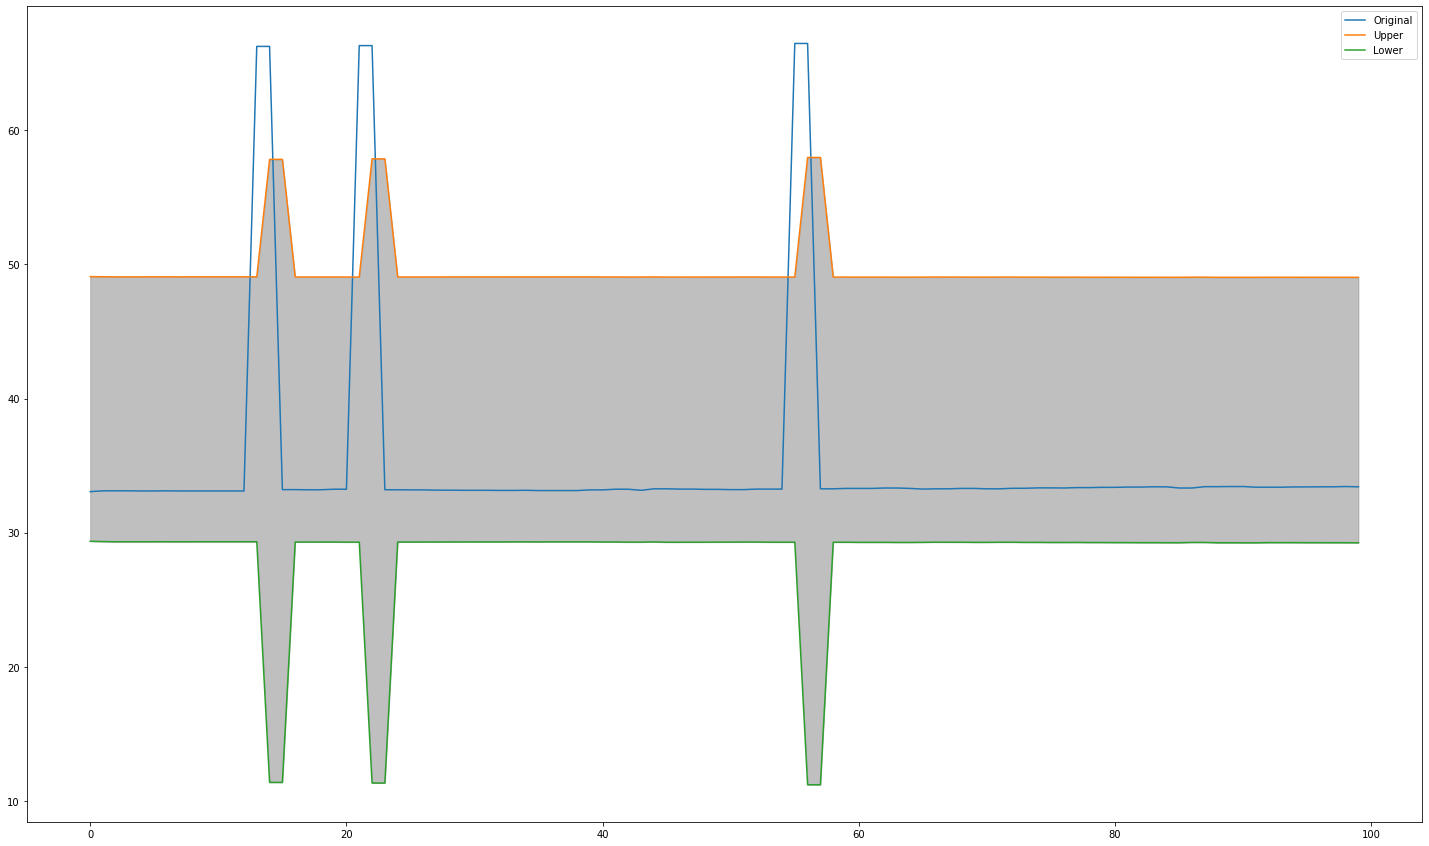

In [21]:
start = 0
end = 100

fig, axs = plt.subplots(1)
fig.set_figheight(15)
fig.set_figwidth(25)
axs.plot(x[start:end], values[start:end], label="Original")
axs.plot(x[start:end], upper[start:end], label="Upper")
axs.plot(x[start:end], lower[start:end], label="Lower")
axs.fill_between(x[start:end], upper[start:end], lower[start:end], color='grey', alpha=0.5)
axs.legend()
#fig.savefig(full_path, facecolor='white', transparent=False)
plt.show()
plt.close(fig)

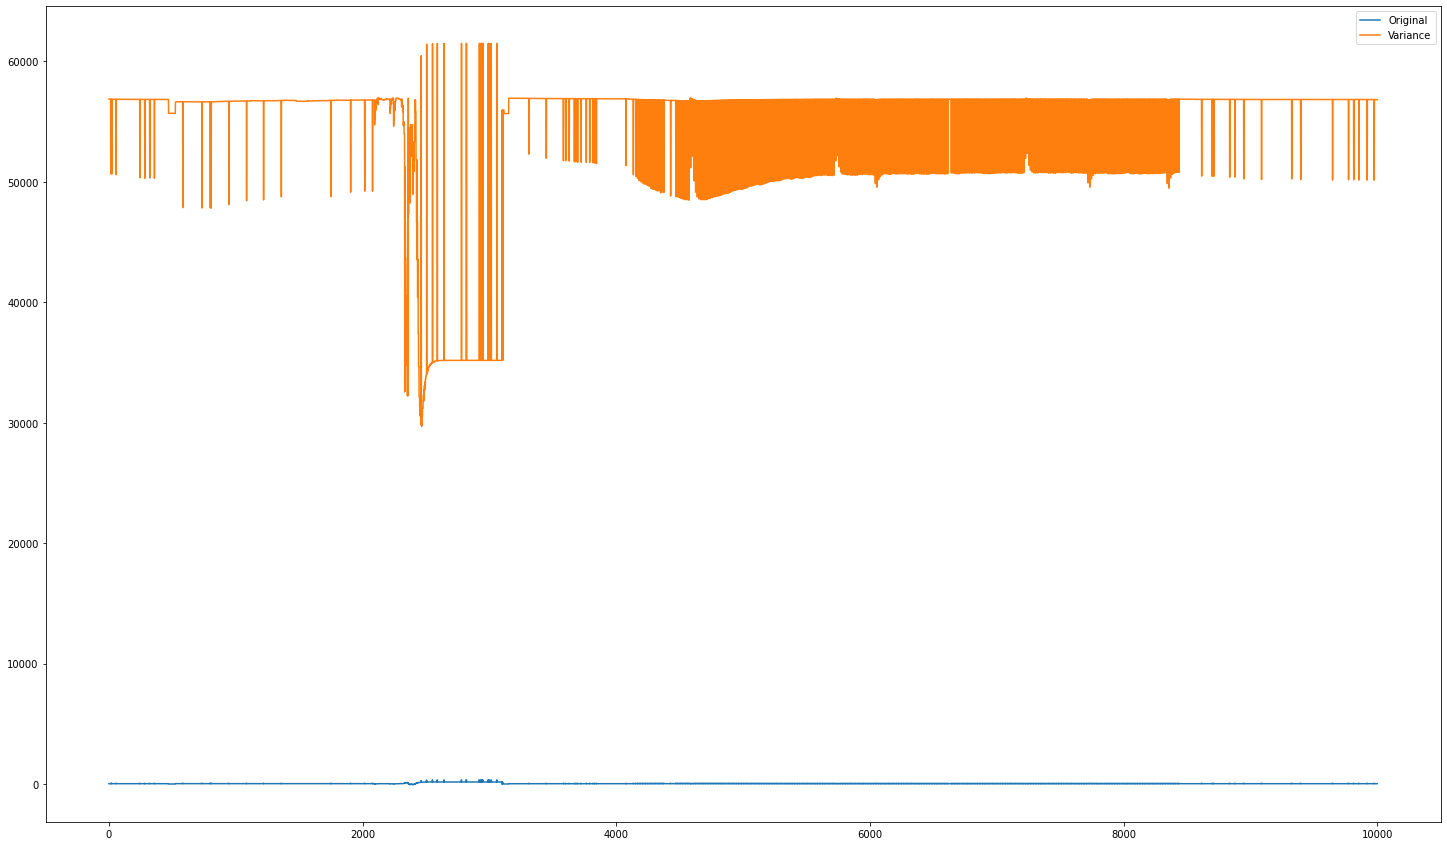

In [20]:
fig, axs = plt.subplots(1)
fig.set_figheight(15)
fig.set_figwidth(25)
axs.plot(x[start:end], values[start:end], label="Original")
axs.plot(x[start:end], variance[start:end], label="Variance")
axs.legend()
#fig.savefig(full_path, facecolor='white', transparent=False)
plt.show()
plt.close(fig)